In [54]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [55]:
img = cv2.imread('img.jpg', cv2.IMREAD_GRAYSCALE)
print(img.shape)

if img is None:
    print("erreur de chargement")
    exit(0)

(1000, 1778)


In [56]:
vois = 5

In [57]:
def filterMoy(img):
    h,w = img.shape
    imgMoy = np.zeros(img.shape, img.dtype)
    for y in range(h):
        for x in range(w):
            # traiter bornes
            if (y < int(vois/2) or y > h - int(vois/2) or x < int(vois/2) or x > w - int(vois/2) ):
                imgMoy[y,x] = img[y,x]
            else:
            # traitement non particulier
                imgV = img[int(y - vois /2):int(y+vois/2), int(x - vois /2):int(x+vois/2)]
                # moy = 0
                # for yv in range (imgV.shape[0]):
                #     for xv in range (imgV.shape[1]):
                #         moy += imgV[yv,xv]
                # moy /= vois * vois
                # imgMoy[y,x] = moy
                imgMoy[y,x] = np.mean(imgV)
    return imgMoy

In [61]:
def filterMed(img):
    h,w = img.shape
    imgMed = np.zeros(img.shape, img.dtype)
    for y in range(h):
        for x in range(w):
            # traiter bornes
            if (y < int(vois/2) or y > h - int(vois/2) or x < int(vois/2) or x > w - int(vois/2) ):
                imgMed[y,x] = img[y,x]
            else:
            # traitement non particulier
                imgV = img[int(y - vois /2):int(y+vois/2), int(x - vois /2):int(x+vois/2)]
                # pour chq pixel declarr un tableau
                t = np.zeros((vois * vois), np.uint8)
                for yv in range (imgV.shape[0]):
                    for xv in range (imgV.shape[1]):
                        t[yv*vois+xv] = imgV[yv,xv]
                t.sort()
                imgMed[y,x] = t[int(vois* vois/2) + 1]
    return imgMed

In [59]:
imgMoy = filterMoy(img)

In [62]:
imgMed = filterMed(img)

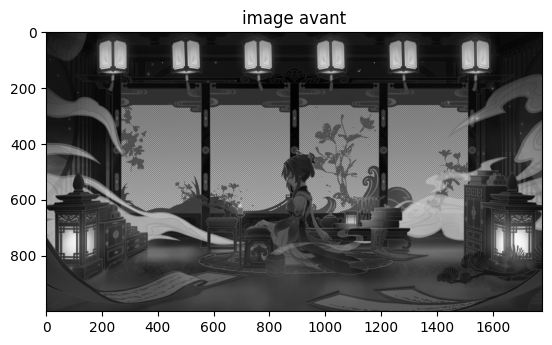

In [69]:
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.title('image avant')
plt.imshow(img_rgb)
plt.show()

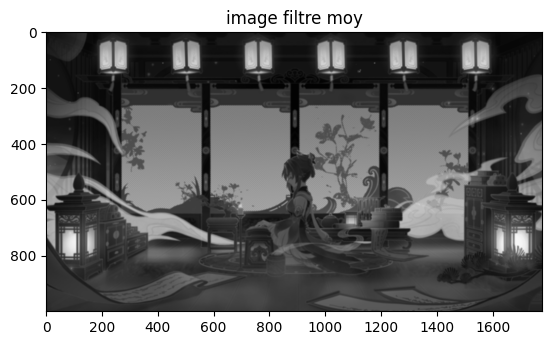

In [67]:
#image floue
img_moy_rgb = cv2.cvtColor(imgMoy, cv2.COLOR_BGR2RGB)
plt.title('image filtre moy')
plt.imshow(img_moy_rgb)
plt.show()

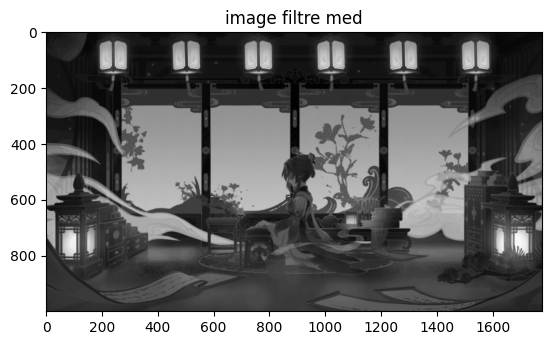

In [68]:
#image floue
img_med_rgb = cv2.cvtColor(imgMed, cv2.COLOR_BGR2RGB)
plt.imshow(img_med_rgb)
plt.title('image filtre med')
plt.show()

In [70]:
cv2.imshow('image avant', img)
cv2.imshow('image moyenne', imgMoy)
cv2.imshow('image median', imgMed)
cv2.waitKey(0)
cv2.destroyAllWindows()